In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('uber.csv')

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
# Checking dimensions of the data frame
df.shape

(200000, 9)

In [6]:
# Variable descriptions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
#Checking Datatypes of each column
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
# Get initial statistics
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [9]:
#Converting pickup datetime to hrs and weeks for simplification
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [10]:
#Removing Unneccessary Columns
df = df.drop(columns=['Unnamed: 0', 'key','pickup_datetime'])

In [11]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3
...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,2


In [12]:
#Checking for Null Values
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
hour                 0
day_of_week          0
dtype: int64

In [13]:
#Filling Null Values
columns = ['dropoff_longitude','dropoff_latitude']
for column in columns:
    df.fillna(df[column].mean(),axis = 0,inplace = True)

In [14]:
#Checking For null values
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day_of_week          0
dtype: int64

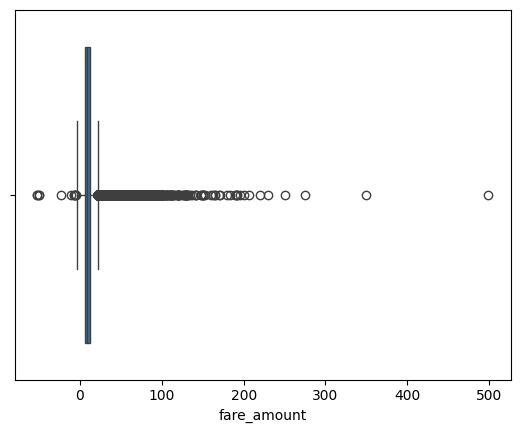

In [15]:
sns.boxplot(x=df["fare_amount"])
plt.show()

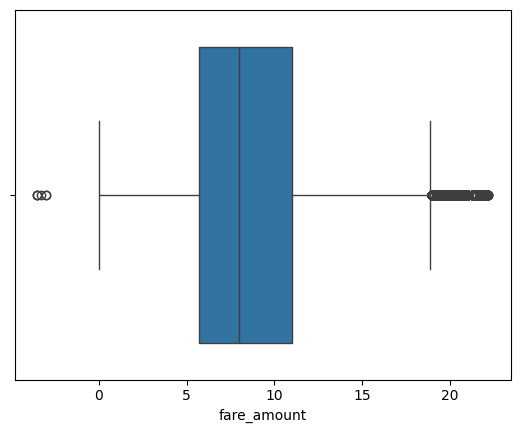

In [16]:
# Calculate the IQR for the 'fare_amount' column
Q1 = df["fare_amount"].quantile(0.25)
Q3 = df["fare_amount"].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold (e.g., 1.5 times the IQR) to identify outliers
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Remove outliers
df_no_outliers = df[(df["fare_amount"] >= lower_bound) & (df["fare_amount"] <= upper_bound)]

# Visualize the 'fare_amount' distribution without outliers
sns.boxplot(x=df_no_outliers["fare_amount"])
plt.show()

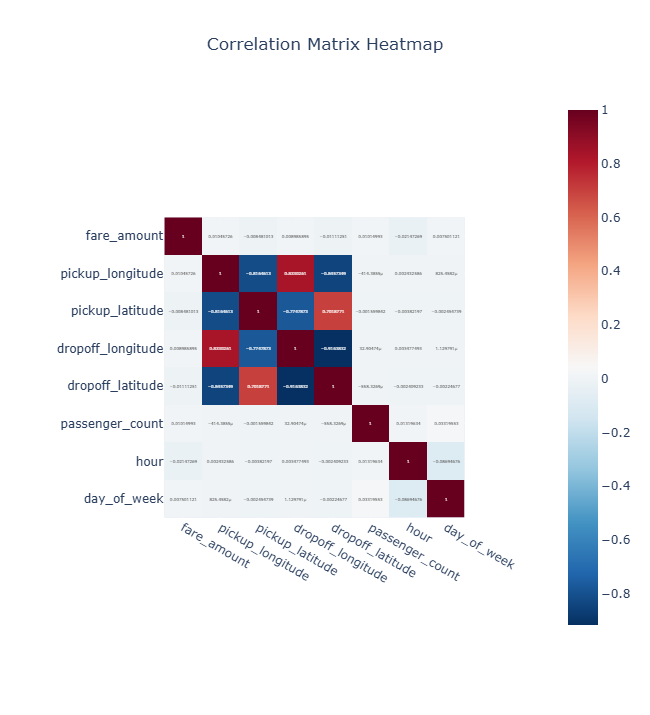

In [17]:
#Using Plotly because matplotlib's heatmap is glitched in latest Jupyter notebook
correlation_matrix = df.corr()

fig = px.imshow(
    correlation_matrix,
    text_auto=True,  
    color_continuous_scale='RdBu_r',  
    title='Correlation Matrix Heatmap'
)

fig.update_layout(
    title_text='Correlation Matrix Heatmap',
    title_x=0.5,
    width=1000,  
    height=700  
)

fig.show()

In [18]:
# Separating features and target variable
X = df.drop(columns=['fare_amount'])  # Dropping the Target Component for training
y = df['fare_amount']  # As it is the Target variable (Type of wine)

In [19]:
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,-73.925023,40.744085,-73.973082,40.761247,5,17,3
...,...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1,10,6
199996,-73.984722,40.736837,-74.006672,40.739620,1,1,4
199997,-73.986017,40.756487,-73.858957,40.692588,2,0,0
199998,-73.997124,40.725452,-73.983215,40.695415,1,14,2


In [20]:
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 200000, dtype: float64

In [21]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Scaling the data using Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Implement Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

In [24]:
# Implement Ridge Regression
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [25]:
# Implement Lasso Regression
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [26]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - R2 Score: {r2:.4f}, RMSE: {rmse:.2f}")

In [27]:
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Linear Regression - R2 Score: 0.0007, RMSE: 10.31
Ridge Regression - R2 Score: 0.0007, RMSE: 10.31
Lasso Regression - R2 Score: 0.0003, RMSE: 10.31
